In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
import os
from vega_datasets import data

In [2]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade topojson
!pip install --upgrade plotly

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\David\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\David\\AppData\\Local\\Temp\\pip-install-apzs90ey\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\David\\AppData\\Local\\Temp\\pip-install-apzs90ey\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\David\AppData\Local\Temp\pip-pip-egg-info-f5yrrqo9'
         cwd: C:\Users\David\AppData\Local\Temp\pip-install-apzs90ey\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command out


  Using cached geopandas-0.9.0-py2.py3-none-any.whl (994 kB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
Requirement already up-to-date: pyshp in c:\users\david\anaconda3\lib\site-packages (2.1.3)
Requirement already up-to-date: shapely in c:\users\david\anaconda3\lib\site-packages (1.7.1)
Requirement already up-to-date: descartes in c:\users\david\anaconda3\lib\site-packages (1.1.0)
Requirement already up-to-date: topojson in c:\users\david\anaconda3\lib\site-packages (1.1)
Requirement already up-to-date: plotly in c:\users\david\anaconda3\lib\site-packages (4.14.3)


In [4]:
path ="C:/Users/David/Downloads"
fullP= os.path.join(path,'Saber_11__2019-2.csv')

Saber_11_2019 = pd.read_csv(fullP,sep=",")
Saber_11_2019.head()

C:\Users\David\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (76,78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO    ESTU_FECHANACIMIENTO  \
0                 TI          COLOMBIA           M  02/18/2002 12:00:00 AM   
1                 TI          COLOMBIA           M  06/28/2003 12:00:00 AM   
2                 TI          COLOMBIA           M  06/02/2001 12:00:00 AM   
3                 TI          COLOMBIA           M  04/26/2002 12:00:00 AM   
4                 TI          COLOMBIA           M  02/05/2002 12:00:00 AM   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_TIENEETNIA ESTU_PAIS_RESIDE  \
0    20194  SB11201940031558      ESTUDIANTE              No         COLOMBIA   
1    20194  SB11201940303339      ESTUDIANTE              No         COLOMBIA   
2    20194  SB11201940255017      ESTUDIANTE              No         COLOMBIA   
3    20194  SB11201940154799      ESTUDIANTE              Si         COLOMBIA   
4    20194  SB11201940280831      ESTUDIANTE              No         COLOMBIA   

  ESTU_ETNIA  ... PUNT_INGLES PERCENTIL_INGLES DESEMP_INGLES PUNT_GLOBAL  \
0          -  ...        54.0               67            A1         208   
1          -  ...        63.0               88            A2         299   
2          -  ...        64.0               89            A2         299   
3    Ninguno  ...        53.0               67            A1         309   
4          -  ...        52.0               63            A1         288   

  PERCENTIL_GLOBAL ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL  \
0               25     50.9421557404314                   2   
1               83      59.767864431576                   3   
2               84     50.7642383644749                   2   
3               88     45.7791353123516                   2   
4               78     52.9109464277177                   3   

  ESTU_NSE_ESTABLECIMIENTO ESTU_ESTADOINVESTIGACION         ESTU_GENERACION-E  
0                      2.0                 PUBLICAR                        NO  
1                      4.0                 PUBLICAR                        NO  
2                      3.0                 PUBLICAR  GENERACION E - GRATUIDAD  
3                      3.0                 PUBLICAR  GENERACION E - GRATUIDAD  
4                      3.0                 PUBLICAR                        NO  

[5 rows x 82 columns]

### Limpieza De Datos 

In [5]:
print('Saber_11_2019')
print('Filas: ', Saber_11_2019.shape[0])
print('Columnas: ', Saber_11_2019.shape[1])

Saber_11_2019
Filas:  546212
Columnas:  82


Las dimensiones de esta base de datos consta de 546212 filas y de 82 columnas.

In [6]:
Saber_11_2019.dtypes[1:50]

ESTU_NACIONALIDAD                object
ESTU_GENERO                      object
ESTU_FECHANACIMIENTO             object
PERIODO                           int64
ESTU_CONSECUTIVO                 object
ESTU_ESTUDIANTE                  object
ESTU_TIENEETNIA                  object
ESTU_PAIS_RESIDE                 object
ESTU_ETNIA                       object
ESTU_DEPTO_RESIDE                object
ESTU_COD_RESIDE_DEPTO            object
ESTU_MCPIO_RESIDE                object
ESTU_COD_RESIDE_MCPIO            object
FAMI_ESTRATOVIVIENDA             object
FAMI_PERSONASHOGAR               object
FAMI_CUARTOSHOGAR                object
FAMI_EDUCACIONPADRE              object
FAMI_EDUCACIONMADRE              object
FAMI_TRABAJOLABORPADRE           object
FAMI_TRABAJOLABORMADRE           object
FAMI_TIENEINTERNET               object
FAMI_TIENESERVICIOTV             object
FAMI_TIENECOMPUTADOR             object
FAMI_TIENELAVADORA               object
FAMI_TIENEHORNOMICROOGAS         object


In [7]:
Saber_11_2019.dtypes[51:82]

COLE_COD_MCPIO_UBICACION           int64
COLE_MCPIO_UBICACION              object
COLE_COD_DEPTO_UBICACION           int64
COLE_DEPTO_UBICACION              object
ESTU_PRIVADO_LIBERTAD             object
ESTU_COD_MCPIO_PRESENTACION        int64
ESTU_MCPIO_PRESENTACION           object
ESTU_DEPTO_PRESENTACION           object
ESTU_COD_DEPTO_PRESENTACION        int64
PUNT_LECTURA_CRITICA               int64
PERCENTIL_LECTURA_CRITICA          int64
DESEMP_LECTURA_CRITICA             int64
PUNT_MATEMATICAS                   int64
PERCENTIL_MATEMATICAS              int64
DESEMP_MATEMATICAS                 int64
PUNT_C_NATURALES                   int64
PERCENTIL_C_NATURALES              int64
DESEMP_C_NATURALES                 int64
PUNT_SOCIALES_CIUDADANAS           int64
PERCENTIL_SOCIALES_CIUDADANAS      int64
DESEMP_SOCIALES_CIUDADANAS         int64
PUNT_INGLES                      float64
PERCENTIL_INGLES                   int64
DESEMP_INGLES                     object
PUNT_GLOBAL     

Los tipos de la base de datos toco divirla en 2 ya que si se pone Saber_11_2019.dtypes no nos deja visualizarlo en una sola linea de codigo, en los primeros 50 datos predomina la variable caracther mientras que en las 30 ultimas ya predomina tanto las variables flotantes como enteros.  

### Datos perdidos 

In [8]:
Saber_11_2019.isnull().sum()

ESTU_TIPODOCUMENTO              0
ESTU_NACIONALIDAD               0
ESTU_GENERO                     0
ESTU_FECHANACIMIENTO            0
PERIODO                         0
                            ...  
ESTU_INSE_INDIVIDUAL            4
ESTU_NSE_INDIVIDUAL         17041
ESTU_NSE_ESTABLECIMIENTO       44
ESTU_ESTADOINVESTIGACION        0
ESTU_GENERACION-E               0
Length: 82, dtype: int64

### Porcentaje de Datos Nulos

In [9]:
for col in Saber_11_2019.columns:
    num_missing = Saber_11_2019[col].isnull().sum()
    pct_missing = np.mean(Saber_11_2019[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

ESTU_TIPODOCUMENTO - 0.0% - 0
ESTU_NACIONALIDAD - 0.0% - 0
ESTU_GENERO - 0.0% - 0
ESTU_FECHANACIMIENTO - 0.0% - 0
PERIODO - 0.0% - 0
ESTU_CONSECUTIVO - 0.0% - 0
ESTU_ESTUDIANTE - 0.0% - 0
ESTU_TIENEETNIA - 0.0% - 0
ESTU_PAIS_RESIDE - 0.0% - 0
ESTU_ETNIA - 0.0% - 0
ESTU_DEPTO_RESIDE - 0.07% - 377
ESTU_COD_RESIDE_DEPTO - 0.0% - 0
ESTU_MCPIO_RESIDE - 0.07% - 377
ESTU_COD_RESIDE_MCPIO - 0.0% - 0
FAMI_ESTRATOVIVIENDA - 0.0% - 26
FAMI_PERSONASHOGAR - 1.55% - 8463
FAMI_CUARTOSHOGAR - 1.18% - 6418
FAMI_EDUCACIONPADRE - 1.52% - 8292
FAMI_EDUCACIONMADRE - 3.84% - 20959
FAMI_TRABAJOLABORPADRE - 1.49% - 8131
FAMI_TRABAJOLABORMADRE - 1.37% - 7469
FAMI_TIENEINTERNET - 1.53% - 8337
FAMI_TIENESERVICIOTV - 4.08% - 22280
FAMI_TIENECOMPUTADOR - 1.5% - 8185
FAMI_TIENELAVADORA - 1.4% - 7643
FAMI_TIENEHORNOMICROOGAS - 1.58% - 8630
FAMI_TIENEAUTOMOVIL - 1.5% - 8206
FAMI_TIENEMOTOCICLETA - 1.61% - 8817
FAMI_TIENECONSOLAVIDEOJUEGOS - 1.41% - 7725
FAMI_NUMLIBROS - 1.58% - 8654
FAMI_COMELECHEDERIVADOS - 4.08% - 

El porcentaje mas alto de datos perdidos para esta base es de **5.55%** la cual es **ESTU_DEDICACIONINTERNET**, y le siguen las variables **FAMI_COMELECHEDERIVADOS** ,**FAMI_TIENESERVICIOTV** y **FAMI_COMECEREALFRUTOSLEGUMBRE** con un **4.08% , 4.09%**, 1 de las 4 variables. 

In [10]:
Saber_11_2019[Saber_11_2019["ESTU_DEDICACIONINTERNET"].isnull() == True]

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO  \
5                      CC          COLOMBIA           M   
18                     TI          COLOMBIA           M   
19                     TI          COLOMBIA           M   
23                     TI          COLOMBIA           M   
28                     CC          COLOMBIA           F   
...                   ...               ...         ...   
546070                 TI          COLOMBIA           F   
546108                 TI          COLOMBIA           F   
546153                 CC          COLOMBIA           F   
546154                 TI          COLOMBIA           F   
546167                 CC          COLOMBIA           F   

          ESTU_FECHANACIMIENTO  PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE  \
5       04/08/1999 12:00:00 AM    20194  SB11201940212273      ESTUDIANTE   
18      08/08/2001 12:00:00 AM    20194  SB11201940448382      ESTUDIANTE   
19      10/29/2001 12:00:00 AM    20194  SB11201940182797      ESTUDIANTE   
23      01/16/2002 12:00:00 AM    20194  SB11201940421389      ESTUDIANTE   
28      12/01/1999 12:00:00 AM    20194  SB11201940419057      ESTUDIANTE   
...                        ...      ...               ...             ...   
546070  05/23/2003 12:00:00 AM    20194  SB11201940146877      ESTUDIANTE   
546108  05/24/2003 12:00:00 AM    20194  SB11201940157799      ESTUDIANTE   
546153  09/16/1997 12:00:00 AM    20194  SB11201940528179      ESTUDIANTE   
546154  03/09/2002 12:00:00 AM    20194  SB11201940537613      ESTUDIANTE   
546167  07/17/2002 12:00:00 AM    20194  SB11201940546576      ESTUDIANTE   

       ESTU_TIENEETNIA ESTU_PAIS_RESIDE ESTU_ETNIA  ... PUNT_INGLES  \
5                   No         COLOMBIA          -  ...        35.0   
18                  No         COLOMBIA          -  ...        44.0   
19                  No         COLOMBIA          -  ...        54.0   
23                  No         COLOMBIA          -  ...        24.0   
28                  Si         COLOMBIA       Paez  ...        36.0   
...                ...              ...        ...  ...         ...   
546070              No         COLOMBIA          -  ...        51.0   
546108              No         COLOMBIA          -  ...        33.0   
546153              No         COLOMBIA          -  ...        26.0   
546154              No         COLOMBIA          -  ...        36.0   
546167              Si         COLOMBIA      Wayúu  ...        37.0   

       PERCENTIL_INGLES DESEMP_INGLES PUNT_GLOBAL PERCENTIL_GLOBAL  \
5                    14            A-         198               19   
18                   38            A-         234               43   
19                   67            A1         238               46   
23                    1            A-         170                6   
28                   16            A-         200               20   
...                 ...           ...         ...              ...   
546070               61            A1         257               60   
546108               10            A-         155                2   
546153                2            A-         152                2   
546154               17            A-         213               29   
546167               18            A-         201               21   

       ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL ESTU_NSE_ESTABLECIMIENTO  \
5          45.0066313321494                   2                      2.0   
18                        -                 NaN                      2.0   
19                        -                 NaN                      3.0   
23                        -                 NaN                      2.0   
28                        -                 NaN                      1.0   
...                     ...                 ...                      ...   
546070     58.9726038905238                   3                      3.0   
546108     40.4712027890008                   1                      2.

Como se evidencia hay 30298 pero hay diferentes columnas con NaN como lo son **ESTU_INSE_INDIVIDUAL** ,**ESTU_NSE_INDIVIDUAL**, **ESTU_ETNIA** por ende si eliminamos esta varialbes se eliminaran mas NaNs de la base lo que bueno ya que estariamos conservando más cantidad de datos. 

### Eliminación de los NaNs

In [11]:
Saber_11_2019_a=Saber_11_2019.dropna() ## eliminamos los datos nulos
Saber_11_2019_a.isnull().sum()

ESTU_TIPODOCUMENTO          0
ESTU_NACIONALIDAD           0
ESTU_GENERO                 0
ESTU_FECHANACIMIENTO        0
PERIODO                     0
                           ..
ESTU_INSE_INDIVIDUAL        0
ESTU_NSE_INDIVIDUAL         0
ESTU_NSE_ESTABLECIMIENTO    0
ESTU_ESTADOINVESTIGACION    0
ESTU_GENERACION-E           0
Length: 82, dtype: int64

 Para rectificar que se eliminaron los datos faltantes vamos a ejecutar la linea de codigo 13

In [12]:
for col in Saber_11_2019_a.columns:
    num_missing = Saber_11_2019_a[col].isnull().sum()
    pct_missing = np.mean(Saber_11_2019_a[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

ESTU_TIPODOCUMENTO - 0.0% - 0
ESTU_NACIONALIDAD - 0.0% - 0
ESTU_GENERO - 0.0% - 0
ESTU_FECHANACIMIENTO - 0.0% - 0
PERIODO - 0.0% - 0
ESTU_CONSECUTIVO - 0.0% - 0
ESTU_ESTUDIANTE - 0.0% - 0
ESTU_TIENEETNIA - 0.0% - 0
ESTU_PAIS_RESIDE - 0.0% - 0
ESTU_ETNIA - 0.0% - 0
ESTU_DEPTO_RESIDE - 0.0% - 0
ESTU_COD_RESIDE_DEPTO - 0.0% - 0
ESTU_MCPIO_RESIDE - 0.0% - 0
ESTU_COD_RESIDE_MCPIO - 0.0% - 0
FAMI_ESTRATOVIVIENDA - 0.0% - 0
FAMI_PERSONASHOGAR - 0.0% - 0
FAMI_CUARTOSHOGAR - 0.0% - 0
FAMI_EDUCACIONPADRE - 0.0% - 0
FAMI_EDUCACIONMADRE - 0.0% - 0
FAMI_TRABAJOLABORPADRE - 0.0% - 0
FAMI_TRABAJOLABORMADRE - 0.0% - 0
FAMI_TIENEINTERNET - 0.0% - 0
FAMI_TIENESERVICIOTV - 0.0% - 0
FAMI_TIENECOMPUTADOR - 0.0% - 0
FAMI_TIENELAVADORA - 0.0% - 0
FAMI_TIENEHORNOMICROOGAS - 0.0% - 0
FAMI_TIENEAUTOMOVIL - 0.0% - 0
FAMI_TIENEMOTOCICLETA - 0.0% - 0
FAMI_TIENECONSOLAVIDEOJUEGOS - 0.0% - 0
FAMI_NUMLIBROS - 0.0% - 0
FAMI_COMELECHEDERIVADOS - 0.0% - 0
FAMI_COMECARNEPESCADOHUEVO - 0.0% - 0
FAMI_COMECEREALFRUTOSLEGUMB

Ahora vamos a mirar que cantidad de NaNs eliminamos de la base:

In [13]:
print('Saber_11_2019_a')
print('Filas: ', Saber_11_2019_a.shape[0])
print('Columnas: ', Saber_11_2019_a.shape[1])

Saber_11_2019_a
Filas:  489561
Columnas:  82


In [14]:
489561/546212 -1

-0.10371613952091863

Se eliminaron de la base 56651 datos lo cual en porcentaje es un 10.37% de los datos. Despues de haber verificado y realizado cada uno de los datos de limpieza ya podemos realizar los graficos de visualización de datos.

In [15]:
Saber_11_2019_a.COLE_CARACTER.value_counts()

ACADÉMICO            261681
TÉCNICO/ACADÉMICO    166300
TÉCNICO               54275
NO APLICA              6417
-                       888
Name: COLE_CARACTER, dtype: int64

In [16]:
Saber_11_2019_a

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO  \
0                      TI          COLOMBIA           M   
1                      TI          COLOMBIA           M   
2                      TI          COLOMBIA           M   
3                      TI          COLOMBIA           M   
4                      TI          COLOMBIA           M   
...                   ...               ...         ...   
546207                 CC          COLOMBIA           M   
546208                 TI          COLOMBIA           M   
546209                 TI          COLOMBIA           M   
546210                 TI          COLOMBIA           M   
546211                 TI          COLOMBIA           M   

          ESTU_FECHANACIMIENTO  PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE  \
0       02/18/2002 12:00:00 AM    20194  SB11201940031558      ESTUDIANTE   
1       06/28/2003 12:00:00 AM    20194  SB11201940303339      ESTUDIANTE   
2       06/02/2001 12:00:00 AM    20194  SB11201940255017      ESTUDIANTE   
3       04/26/2002 12:00:00 AM    20194  SB11201940154799      ESTUDIANTE   
4       02/05/2002 12:00:00 AM    20194  SB11201940280831      ESTUDIANTE   
...                        ...      ...               ...             ...   
546207  02/25/1999 12:00:00 AM    20194  SB11201940195862      ESTUDIANTE   
546208  10/14/2002 12:00:00 AM    20194  SB11201940253002      ESTUDIANTE   
546209  11/22/2002 12:00:00 AM    20194  SB11201940364767      ESTUDIANTE   
546210  11/10/2002 12:00:00 AM    20194  SB11201940210026      ESTUDIANTE   
546211  06/02/2002 12:00:00 AM    20194  SB11201940074679      ESTUDIANTE   

       ESTU_TIENEETNIA ESTU_PAIS_RESIDE ESTU_ETNIA  ... PUNT_INGLES  \
0                   No         COLOMBIA          -  ...        54.0   
1                   No         COLOMBIA          -  ...        63.0   
2                   No         COLOMBIA          -  ...        64.0   
3                   Si         COLOMBIA    Ninguno  ...        53.0   
4                   No         COLOMBIA          -  ...        52.0   
...                ...              ...        ...  ...         ...   
546207              No         COLOMBIA          -  ...        58.0   
546208              No         COLOMBIA          -  ...        74.0   
546209              No         COLOMBIA          -  ...        72.0   
546210              No         COLOMBIA          -  ...        46.0   
546211              No         COLOMBIA          -  ...        74.0   

       PERCENTIL_INGLES DESEMP_INGLES PUNT_GLOBAL PERCENTIL_GLOBAL  \
0                    67            A1         208               25   
1                    88            A2         299               83   
2                    89            A2         299               84   
3                    67            A1         309               88   
4                    63            A1         288               78   
...                 ...           ...         ...              ...   
546207               79            A2         360               99   
546208               97            B1         360               99   
546209               96            B1         377              100   
546210               45            A-         278               73   
546211               97            B1         365               99   

       ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL ESTU_NSE_ESTABLECIMIENTO  \
0          50.9421557404314                   2                      2.0   
1           59.767864431576                   3                      4.0   
2          50.7642383644749                   2                      3.0   
3          45.7791353123516                   2                      3.0   
4          52.9109464277177                   3                      3.0   
...                     ...                 ...                      ...   
546207     47.5807720132296                   2                      2.0   
546208      57.406418472062                   3                      4.

### **Graficos**
#####  Alex Ballesteros Pulido

### Visualización datos multivariados

In [17]:
columns = ['ESTU_DEPTO_PRESENTACION',
          'PUNT_MATEMATICAS',
          'PUNT_LECTURA_CRITICA',
          'PUNT_C_NATURALES', 
          'PUNT_SOCIALES_CIUDADANAS',
          'PUNT_INGLES']

Saber_11_2019_1 = Saber_11_2019_a.copy()
Saber_11_2019_1 = Saber_11_2019_1[columns]
Saber_11_2019_1

ESTU_DEPTO_PRESENTACION  PUNT_MATEMATICAS  PUNT_LECTURA_CRITICA  \
0                    MAGDALENA                48                    47   
1                       BOGOTÁ                65                    60   
2                      BOLIVAR                57                    66   
3                       BOGOTÁ                54                    62   
4                       BOGOTÁ                57                    63   
...                        ...               ...                   ...   
546207               ANTIOQUIA                78                    76   
546208                  BOGOTÁ                73                    75   
546209                  ARAUCA                83                    72   
546210               SANTANDER                61                    59   
546211                  BOGOTÁ                73                    76   

        PUNT_C_NATURALES  PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  
0                     37                        30         54.0  
1                     54                        59         63.0  
2                     41                        74         64.0  
3                     61                        73         53.0  
4                     55                        57         52.0  
...                  ...                       ...          ...  
546207                65                        74         58.0  
546208                72                        67         74.0  
546209                71                        77         72.0  
546210                54                        52         46.0  
546211                72                        71         74.0  

[489561 rows x 6 columns]

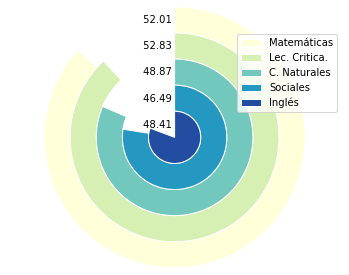

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10
labels=['Matemáticas','Lec. Critica.','C. Naturales','Sociales','Inglés']
dataa=Saber_11_2019_1[Saber_11_2019_1.ESTU_DEPTO_PRESENTACION.isin(['META'])]
mat=round(dataa.PUNT_MATEMATICAS.mean(),2)
leng=round(dataa.PUNT_LECTURA_CRITICA.mean(),2)
nat=round(dataa.PUNT_C_NATURALES.mean(),2)
soc=round(dataa.PUNT_SOCIALES_CIUDADANAS.mean(),2)
ing=round(dataa.PUNT_INGLES.mean(),2)
data=[mat,leng,nat,soc,ing]

n=len(data)
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)
r = 1.5
w = r / n 
colors = [cm.YlGnBu(i / n) for i in range(n)]
fig, ax = plt.subplots()
ax.axis("equal")
for i in range(n):
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f' {data[i]} ', ha='right', va='center')

    
plt.legend()
plt.show()

#### ¿Qué?

Este gráfico de barras radiales nos resume el promedio del puntaje por componente obtenido para los estudiantes que presentaron su prueba saber 11 en el año 2019 y en la capital del país, contamos con los puntajes para cada estudiante en una variable categórica que se divide en 5 categorías correspondientes a los componentes a evaluar en la pruebaa en este caso solamente se presentaran los datos de los estudiantes que presentaron la prueba en el departamento Meta, los datos son estáticos ya que representan una foto en el tiempo y solo está midiendo una vez.

#### ¿Por Qué?

La gráfica quiere mostrar y comparar las medias obtenidas para los componentes evaluados en las pruebas presentadas en el departamento Meta, siendo Lectura Critica la que mayor promedio tiene y Sociales y Ciudadanas la de menor promedio, se planea explorar las areas con mayor debilidad para los estudiantes culminando su bachillerato, además se encuentra una buena manera de hacerlo en este tipo de graficos ya que se pueden comparar facilmente debido a que todos empiezan en el mismo punto.

#### Marcas y Canales
En el gráfico se utiliza una marca de área ya que se representa como pedazos de una circunferencia, así mismo se utiliza un canal de área ya que la longitud del área nos indicará la magnitud de la misma

#### Mejoras posibles
Se podría agregar un titulo, el solo indicar el valor promedio podría llevar a un problema de confusión visual, al momento de elegir la paleta de colores se debe tener mucho cuidado con la oclusión en esta clase de gráficos, aunque hay gráficos que podrían cumplir la misma función con una forma más entendible, me parece que debido a que se busca comparar entre ellos, se podría ver bien representados acá porque nos ayuda a tener una buena referencia de las proporciones entre los componentes(ya que la circunferencia se proporciona en base al rango de los datos)

### Visualización datos espaciales

In [19]:
df = pd.read_excel('C:/Users/David/Downloads/base_mat.xlsx',dtype ={"COLE_COD_DEPTO_UBICACION":str})
df.head()

COLE_COD_DEPTO_UBICACION COLE_DEPTO_UBICACION  puntaje_pro
0                       47            MAGDALENA    45.203092
1                       11              BOGOTÃ    54.613664
2                       13              BOLIVAR    46.552128
3                       08            ATLANTICO    49.267225
4                       76                VALLE    49.274183

In [20]:
from urllib.request import urlopen
import json
with urlopen('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json') as response:
    departamentos = json.load(response)

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(df, geojson=departamentos, 
                           locations='COLE_COD_DEPTO_UBICACION', 
                           featureidkey = 'properties.DPTO',
                           color='puntaje_pro',
                           mapbox_style="carto-positron",
                           zoom=5
                          )
fig.show()

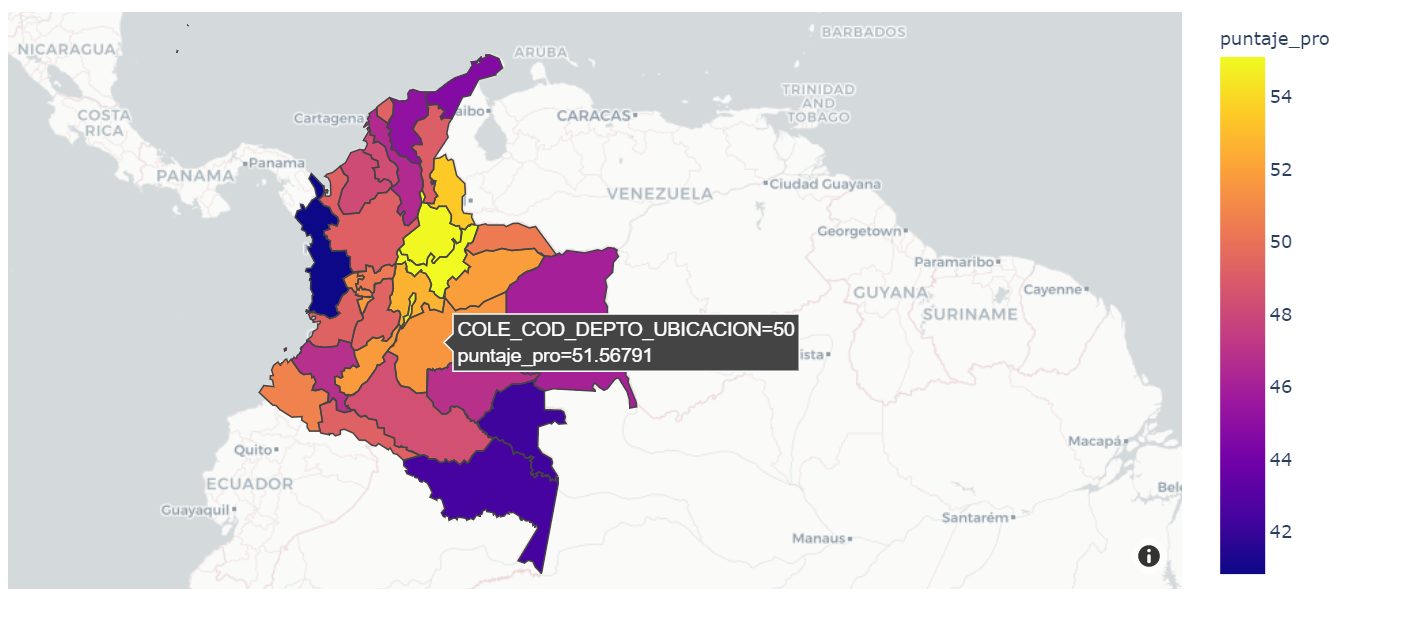

#### ¿Qué?

Esta visualización de datos es un mapa coropleto que nos mostrará el puntaje promedio para el componente de matématicas, contamos con una variable que será cuantitativa (el puntaje) y una variable que nos ayudará a referenciar el departamento en el cual está ubicado el colegio en el cual estudia el estudiante, los datos son estaticos.

#### ¿Por Qué?

La visualización quiere mostrar y comparar los promedios de puntaje para los departamentos de Colombia obtenidos en la prueba saber 2019 en el componente de matematicas, se busca obtener información de relación con este promedio y la calidad de educación de estos departamentos, se escoge el puntaje de matematicas ya que se considera nos puede dar una buena apreciación del puntaje global, además que este componente siempre se busca mejorar debido al peso que esta tiene a nivel de calificación del estudiante (ejemplo, en una entrevista de trabajo un mejor puntaje en matematicas puede hacerte más viable para el trabajo) .

#### Marcas y Canales
En el gráfico se utiliza una marca de área ya que se representa como ubicaciones en un mapa, y un canal de color para determinar en que zonas hay mejor/peor puntaje promedio.

#### Mejoras posibles

Al momento de interactuar con el gráfico no nos muestra el nombre del departamento unicamente el codigo lo cual nos hace un poco más dificil entender el gráfico o llegar a identificar algunos departamentos, no se realiza una discriminación entre colegio oficial/no oficial.

### Visualización datos temporales

In [22]:
a=Saber_11_2019_a["ESTU_FECHANACIMIENTO"].str.split('/', expand=True)
Fecha=a.rename(columns={0:"Mes",1:"Dia",2:"Año y Hora"});Fecha
año=Fecha["Año y Hora"].str.split(' ', expand=True)

In [23]:
año = año.rename(columns={0:"Año",1:"hora",2:"AM o PM"})
año = año["Año"]

In [24]:
Saber_11_2019_a.insert(1, 'Año', año)

In [25]:
columns = ['Año','PUNT_INGLES']
base = Saber_11_2019_a.copy()
base = base[columns]
base

Año  PUNT_INGLES
0       2002         54.0
1       2003         63.0
2       2001         64.0
3       2002         53.0
4       2002         52.0
...      ...          ...
546207  1999         58.0
546208  2002         74.0
546209  2002         72.0
546210  2002         46.0
546211  2002         74.0

[489561 rows x 2 columns]

In [26]:
base["Año"]=base["Año"].astype(float)

In [27]:
base=base[(base.Año <= 2005.0 )];base
base=base[(base.Año >= 1999.0 )];base

Año  PUNT_INGLES
0       2002.0         54.0
1       2003.0         63.0
2       2001.0         64.0
3       2002.0         53.0
4       2002.0         52.0
...        ...          ...
546207  1999.0         58.0
546208  2002.0         74.0
546209  2002.0         72.0
546210  2002.0         46.0
546211  2002.0         74.0

[466942 rows x 2 columns]

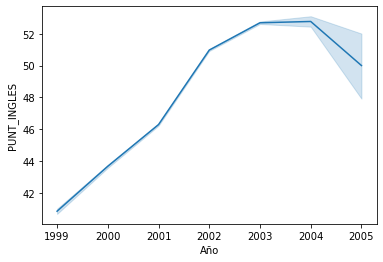

In [28]:
import matplotlib.ticker as mtick
sns.lineplot(data = base, x = "Año", y = "PUNT_INGLES")
plt.ticklabel_format(style = 'plain', axis = 'y')
ax = plt.gca()
ax.yaxis.set_major_formatter('{x:1.0f}')
plt.show()

#### ¿Qué?

Este grafico de línea nos enseña como va cambiando el puntaje promedio obtenido en la prueba saber 2019 en el componente de inglés segun el año de nacimiento del estudiante que presenta la prueba, tenemos una variable cuantitativa que será el puntaje obtenido en inglés por cada estudiante y la fecha de nacimiento del estudiante que será nuestra linea temporal.

#### ¿Por Qué?

Debido a que la prueba se presenta en el 2019 y solamente se tienen datos para este año, se quiere ver como un influye la edad de la persona en el puntaje obtenido en inglés ya que como segunda lengua, y casi que un requisito laboral actualmente, se podría pensar que ahora se adquiere la habilidad en el idioma inglés desde una temprana edad, y aunque en el gráfico se mira un declive para las personas que nacieron en el año 2004-2005, esto nos indica que aun así las personas más jovenes presentan un nivel promedio en el idioma.

#### Marcas y Canales
Marca de linea, canal de posicion horizontal y vertical para la variable cuantitativa y canal de posicion horizontal para la variable categorica.

#### Mejoras posibles

El gráfico se ve un poco simple, se podrían añadir más variables cuantitativas para llegar a comparar, o identificar alguna relación/tendencia entre los puntajes.

### Graficos

##### Camilo Moya Londoño

### Visualización 1(Multivariados)

In [29]:
columns = ['FAMI_ESTRATOVIVIENDA','COLE_NATURALEZA']
base = Saber_11_2019_a.copy()
base = base[columns]
base

FAMI_ESTRATOVIVIENDA COLE_NATURALEZA
0                 Estrato 3         OFICIAL
1                 Estrato 3      NO OFICIAL
2                 Estrato 1         OFICIAL
3                 Estrato 3         OFICIAL
4                 Estrato 3         OFICIAL
...                     ...             ...
546207            Estrato 2         OFICIAL
546208            Estrato 3      NO OFICIAL
546209            Estrato 2         OFICIAL
546210            Estrato 1         OFICIAL
546211            Estrato 3         OFICIAL

[489561 rows x 2 columns]

In [30]:
base["FAMI_ESTRATOVIVIENDA"].value_counts()

Estrato 2      179098
Estrato 1      151859
Estrato 3      103025
Estrato 4       24321
Sin Estrato     16074
Estrato 5        7482
-                4297
Estrato 6        3405
Name: FAMI_ESTRATOVIVIENDA, dtype: int64

In [31]:
base["COLE_NATURALEZA"].value_counts()

OFICIAL       378035
NO OFICIAL    111526
Name: COLE_NATURALEZA, dtype: int64

In [32]:
tab1 = pd.crosstab(base["FAMI_ESTRATOVIVIENDA"],base["COLE_NATURALEZA"])
tab1

COLE_NATURALEZA       NO OFICIAL  OFICIAL
FAMI_ESTRATOVIVIENDA                     
-                            759     3538
Estrato 1                  14419   137440
Estrato 2                  35271   143827
Estrato 3                  39016    64009
Estrato 4                  14339     9982
Estrato 5                   4529     2953
Estrato 6                   1737     1668
Sin Estrato                 1456    14618

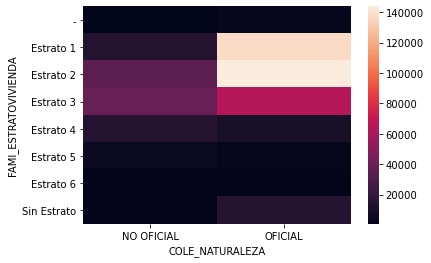

In [33]:
ax = sns.heatmap(tab1)

### ¿Qué? ¿Por qué? ¿Cómo?

 * **¿Qué?** 

    En este mapa de color lo que se quizo representar es la cantidad de estudiantes que hay de cada estrato en por cada tipo de colegio, si es privado (NO OFICIAL) o público (OFICIAL), Por esto el Dataset Type es de Tabla y en Dataset Availability es Estatico al no poder modificar en ningún momento. Y en tipos de attributos es Quantitativo, ya que el color hace referencia a un número. 
    
 
  * **¿Por qué?**
    En la parte de Analyze está Discover al igual que en Search sería Explore, y para el query es un Summarize ya que resume de cierto modo la cantidad de estudiantes que cumple con esas categorias. en Attributes se podria considerar en Similarity, ya que de cierto modo se puede comparar cada celda del mapa de calor para compararlas entre ellas.   
  
  
  * **¿Cómo?**
    Para el tipo de encode es un Map ya que el mapa es de calor, así que el Color es el que permite está visualización. Para Manipulate se podria considerar Select.    

### Marcas y Canales

Para marcas considero que ninguna aplica, pero por la parte de Canales estaría la posición  y el Color, que es la que nos indica la cantidad de personas para cada categoria.

### Posibles mejoras

En posbles mejoras hay varias, la principal es que ciertos colores no se distiguen, al haber tantos de una categoria esto general de cierto modo una oclusión en el grafico que no permite diferenciar bien algunas celdas de las otras, por lo que se podría optar por otra paleta de colores o por otro tipo de visualización.

### Visualización 2(Temporales)

In [34]:
Saber_11_2019_a.ESTU_FECHANACIMIENTO.value_counts()

01/01/1900 12:00:00 AM    1645
09/20/2002 12:00:00 AM     812
09/17/2002 12:00:00 AM     792
09/24/2002 12:00:00 AM     786
09/13/2002 12:00:00 AM     778
                          ... 
09/03/1989 12:00:00 AM       1
04/06/1974 12:00:00 AM       1
04/05/1959 12:00:00 AM       1
01/12/2011 12:00:00 AM       1
12/02/2008 12:00:00 AM       1
Name: ESTU_FECHANACIMIENTO, Length: 9876, dtype: int64

In [35]:
a = Saber_11_2019_a["ESTU_FECHANACIMIENTO"].str.split('/', expand=True)
Fecha = a.rename(columns={0:"Mes",1:"Dia",2:"Año y Hora"})
año = Fecha["Año y Hora"].str.split(' ', expand=True)

In [36]:
año = año.rename(columns={0:"Año",1:"hora",2:"AM o PM"})
año = año["Año"]

In [37]:
Saber_11_2019_a.insert(1, 'Año', año)

ValueError: cannot insert Año, already exists

In [38]:
columns = ['Año','PUNT_MATEMATICAS','ESTU_TIPODOCUMENTO']
base = Saber_11_2019_a.copy()
base = base[columns]
base

Año  PUNT_MATEMATICAS ESTU_TIPODOCUMENTO
0       2002                48                 TI
1       2003                65                 TI
2       2001                57                 TI
3       2002                54                 TI
4       2002                57                 TI
...      ...               ...                ...
546207  1999                78                 CC
546208  2002                73                 TI
546209  2002                83                 TI
546210  2002                61                 TI
546211  2002                73                 TI

[489561 rows x 3 columns]

In [39]:
basea=base[base.ESTU_TIPODOCUMENTO.isin(["CC"])]

In [40]:
base["Año"]=base["Año"].astype(float)

In [41]:
base.Año.value_counts()

2002.0    200022
2003.0    103125
2001.0    101190
2000.0     44274
1999.0     13461
           ...  
1944.0         1
1940.0         1
1910.0         1
2015.0         1
1.0            1
Name: Año, Length: 80, dtype: int64

In [42]:
base = base[(base.Año <= 2001.0 )]
base = base[(base.Año >= 1999.0 )]

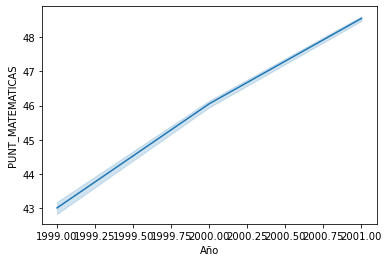

In [43]:
import matplotlib.ticker as mtick
sns.lineplot(data = base, x = "Año", y = "PUNT_MATEMATICAS")
plt.ticklabel_format(style = 'plain', axis = 'y')
ax = plt.gca()
ax.yaxis.set_major_formatter('{x:1.0f}')
plt.show()

### ¿Qué? ¿Por qué? ¿Cómo?

 * **¿Qué?** 

   Para este grafico lo que se quizo representar por el puntaje promedio en el area de matematicas para los mayores de edad de la base de datos, para el tipo de Data and Dataset Types es de Items y Attributes, y con respecto a Dataset Availibility es estatico, ya que no va a cambiar en ningun momento.
    
 
  * **¿Por qué?**
    Al igual que en el grafico anterior, para Analyze sería discover, y en search sería Explore. Para Query es compare, para cada año de nacimiento se puede comparar o identificar la diferencia en el promedio del puntaje de matemáticas. En la parte de Targets en All Data es un Trends, evidentemente para ver la tendencia de la nota. 
  
  
  * **¿Cómo?**
    Para este grafico solo aplica Encode y Order   

### Marcas y Canales

Para el tipo de Marca es lines, ya que es una linea de tiempo, y para canal es la posición, tanto vertical como horizontal, ya que es está posición la que nos indica la nota promedio.

### Posibles mejoras

Una posible mejora es quizá añadirle más lineas de tendencia, para también comparar con otro puntajes en los otros factores evaluados en la Prueba Saber 11.

### Visualizacion 3(Espaciales)

In [ ]:
df = pd.read_excel('C:/Users/camil/Downloads/Promedio.xlsx',dtype ={"ESTU_COD_RESIDE_DEPTO":str})
df.head()

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json') as response:
    departamentos = json.load(response)

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(df, geojson=departamentos, 
                           locations='ESTU_COD_RESIDE_DEPTO', 
                           featureidkey = 'properties.DPTO',
                           color='Promedio',
                           mapbox_style="carto-positron",
                           zoom=5
                          )
fig.show()

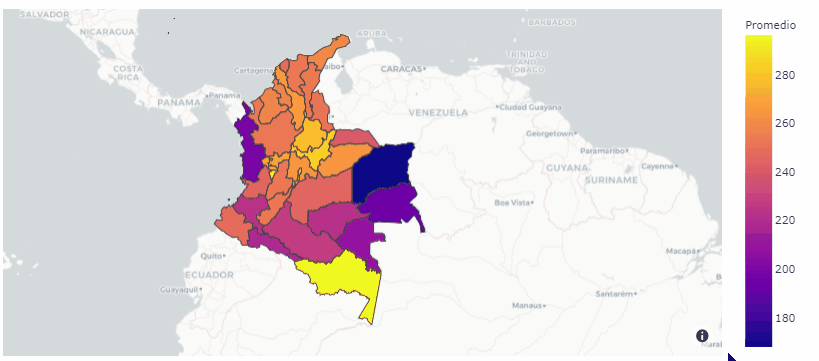

### Posibles mejoras

 * **¿Qué?** 
    Para este mapa lo que se quiere mostrar es por medio del color el promedio del puntaje goblal de los estudiantes que viven en cada departamento, es solo para colegios No Oficiales, es decir privados. Para el tipo de Data es una tabla, y para Dataset Type es evidentemente un Geometry. Para este grafico, se decidio hacer Dynamic, para poder acercarse a los Departementos más pequeños.
    
 
 * **¿Por qué?**
      Para Analyze es un Dicover, para Search puede ser un Browse, ya que te deja navegar el mapa. En la parte de Query es un Identify y Compare. Y para Targets es All Data.
  
  
  * **¿Cómo?**
    En Encode -> Arrange es Use, y para Map es Color, ya que como el mapa de calor, el color nos indica la nota promedio del departamento, y Para Reduce se uso filter, para filtrar los datos a mostrar.  

### Marcas y Canales

Para marcas y canales el principal es color y la posición, ya que los mapas tienen un posición determinada.

### Posibles Mejoras

Una posible mejora puede ser el de poner el nombre de cada departamento. 

### Graficos

##### Kevin Malambo Alvarez

### Visualización 1(Multivariados)

In [44]:
columns = [
           'COLE_CARACTER',
          'ESTU_DEPTO_RESIDE',
          'PUNT_GLOBAL']

base = Saber_11_2019_a.copy()
base = base[columns]
base

COLE_CARACTER ESTU_DEPTO_RESIDE  PUNT_GLOBAL
0       TÉCNICO/ACADÉMICO         MAGDALENA          208
1               ACADÉMICO            BOGOTÁ          299
2       TÉCNICO/ACADÉMICO           BOLIVAR          299
3               ACADÉMICO            BOGOTÁ          309
4       TÉCNICO/ACADÉMICO            BOGOTÁ          288
...                   ...               ...          ...
546207  TÉCNICO/ACADÉMICO         ANTIOQUIA          360
546208          ACADÉMICO            BOGOTÁ          360
546209            TÉCNICO            ARAUCA          377
546210  TÉCNICO/ACADÉMICO         SANTANDER          278
546211          ACADÉMICO            BOGOTÁ          365

[489561 rows x 3 columns]

In [45]:
base.dtypes

COLE_CARACTER        object
ESTU_DEPTO_RESIDE    object
PUNT_GLOBAL           int64
dtype: object

In [46]:
basea=base[(base.PUNT_GLOBAL <= 250)]
basea

COLE_CARACTER ESTU_DEPTO_RESIDE  PUNT_GLOBAL
0       TÉCNICO/ACADÉMICO         MAGDALENA          208
10                TÉCNICO           BOLIVAR          187
11              ACADÉMICO         MAGDALENA          166
14      TÉCNICO/ACADÉMICO         ANTIOQUIA          220
21              ACADÉMICO            BOGOTÁ          242
...                   ...               ...          ...
546192  TÉCNICO/ACADÉMICO           BOLIVAR          217
546196  TÉCNICO/ACADÉMICO         ANTIOQUIA          173
546197  TÉCNICO/ACADÉMICO      CUNDINAMARCA          234
546200  TÉCNICO/ACADÉMICO         ANTIOQUIA          147
546201            TÉCNICO             CAUCA          233

[262555 rows x 3 columns]

In [47]:
basea.ESTU_DEPTO_RESIDE.value_counts()

ANTIOQUIA          37827
BOGOTÁ             28250
VALLE              18655
ATLANTICO          16271
CUNDINAMARCA       15497
BOLIVAR            15101
CORDOBA            11880
MAGDALENA          11076
SANTANDER           9278
TOLIMA              8861
CAUCA               8329
NARIÑO              7888
CESAR               7263
NORTE SANTANDER     6865
BOYACA              6620
HUILA               6383
SUCRE               6311
META                5852
LA GUAJIRA          5798
CALDAS              5233
RISARALDA           4921
CHOCO               3527
CASANARE            2965
QUINDIO             2888
CAQUETA             2607
PUTUMAYO            2224
ARAUCA              1798
GUAVIARE             655
AMAZONAS             553
SAN ANDRES           394
VICHADA              309
VAUPES               231
GUAINIA              170
EXTRANJERO            75
Name: ESTU_DEPTO_RESIDE, dtype: int64

In [48]:
basea= basea[basea.ESTU_DEPTO_RESIDE.isin(["ANTIOQUIA","BOGOTÁ","VALLE","ATLANTICO","SANTANDER","CUNDINAMARCA","BOLIVAR","CORDOBA","MAGDALENA"])]
basea.ESTU_DEPTO_RESIDE.value_counts()

ANTIOQUIA       37827
BOGOTÁ          28250
VALLE           18655
ATLANTICO       16271
CUNDINAMARCA    15497
BOLIVAR         15101
CORDOBA         11880
MAGDALENA       11076
SANTANDER        9278
Name: ESTU_DEPTO_RESIDE, dtype: int64

In [49]:
basea=basea[basea.COLE_CARACTER.isin(["ACADÉMICO","TÉCNICO/ACADÉMICO","TÉCNICO"])]
basea.COLE_CARACTER.value_counts()

ACADÉMICO            92248
TÉCNICO/ACADÉMICO    52173
TÉCNICO              15888
Name: COLE_CARACTER, dtype: int64

In [50]:
tab1 = pd.crosstab(basea["ESTU_DEPTO_RESIDE"],basea["COLE_CARACTER"])
tab1

COLE_CARACTER      ACADÉMICO  TÉCNICO  TÉCNICO/ACADÉMICO
ESTU_DEPTO_RESIDE                                       
ANTIOQUIA              19801     1285              15279
ATLANTICO               8918     3656               3322
BOGOTÁ                 24298      478               3140
BOLIVAR                 6529     3118               5277
CORDOBA                10610      108                812
CUNDINAMARCA            9144      767               5201
MAGDALENA               4131     1257               5554
SANTANDER               3968      718               4521
VALLE                   4849     4501               9067

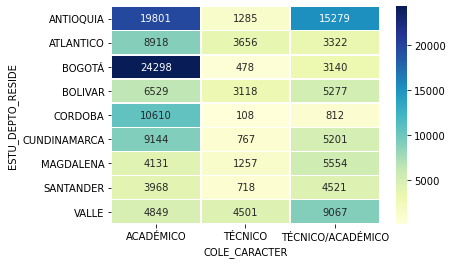

In [51]:
ax = sns.heatmap(tab1,
                 annot=True, 
                 fmt="d",
                 linewidths=.5,
                 cmap="YlGnBu")

### What?,Why?,How?

 * **What?** 

    Para este gráfico de mapa de calor se quiso analizar los diferentes tipos de colegios que se encuentran en la base de datos estos son Académico ,Técnico y Técnico/Académico, y en el eje y tenemos los departamentos que cuentan con un número de personas mayor a 9000, es por eso que solo encontramos 9 departamentos, pero adicional a esto se realizó un filtro por puntajes menores a 250, ya que esto indica que tuvo un icfes bastante malo, es por es que para este ítem en **Datasets** se decidió manejar con **ítems** y  **Attributes** esto llevándonos a tener un tipo de dataset en **tables**, con respecto a la variable **Dataset Availability** tenemos un gráfico **Static** ya que no cuenta con interactividad con el cliente. con respecto a **Atributtes** tenemos que es de tipo **Ordered** de forma **Quantitative** ya que dependiendo del número de personas en cada celda se tiene un tipo de color diferente.
    
 
  * **Why?**
     
    Con respecto al **Action** de este mapa de calor se tiene **Analyze** y **query**, el primero se debe a que a partir de este grafico podemos **Discover** como se están comportando los colegios con respecto a las pruebas saber 11 y esto lleva directamente a un **Enjoy**, con respecto a la segunda variable tenemos **Identify** el cual me permite mirar que en que zonas se encuentran tipos colegios con unos icfes bastante malos con respecto a su ubicación, esto me permite **Compare** entre las diferentes ciudades, y por último en esta matriz me permite visualizar un **Summarize** de los datos en aspectos generales, para el **Targets** solo se decidió tomar **All Data** ya que los otros no se consideraron aptos para este gráfico, siendo la categoría escogida, **Trends** ya que nos muestra que tipos de colegios podemos esperar mayor cantidad de icfes bastante pequeños.
   
      
  
  * **How?**

    Para este se decidió escoger **Econde**, **Manipulate** y **Reduce**, con respecto al primero se utilizaron las 2 sub categorias **Arrange** , **Map**, para **Arrange** se escogió **Separate** ya que es un tipo de grafico de mapa de calor, y para la segunda categoría solo se utilizó **Color**, para **Manipulate** se tiene **Select** ya es un valor en específico el cual se encontró, y para la última se **Filter** ya que se realizó para el puntaje global.
    

### Marcas y Canales

**Marca**:
 
Para este mapa de calor es muy evidente que su marca es de áreas.
 
**Canal**:
 
el canal de posición para esta visualización es **Both**, y además cuenta con el canal de **Color** y **Área**.

### Mejoras Posibles

Una de las mejoras que se le puede realizar a este mapa de calor es que se pueda identificar si el colegio con el que se está trabajando es público o privado, porque si uno tiene estas dos variables adicionales sería mucho más fácil comparar a qué tipo de colegio les va mejor y a cuales no, ya que actualmente existen colegios académicos y técnicos tanto privados con del gobierno.

### Visualización 2(Temporales)

In [52]:
Saber_11_2019_a.ESTU_FECHANACIMIENTO.value_counts()

01/01/1900 12:00:00 AM    1645
09/20/2002 12:00:00 AM     812
09/17/2002 12:00:00 AM     792
09/24/2002 12:00:00 AM     786
09/13/2002 12:00:00 AM     778
                          ... 
09/03/1989 12:00:00 AM       1
04/06/1974 12:00:00 AM       1
04/05/1959 12:00:00 AM       1
01/12/2011 12:00:00 AM       1
12/02/2008 12:00:00 AM       1
Name: ESTU_FECHANACIMIENTO, Length: 9876, dtype: int64

In [53]:
a=Saber_11_2019_a["ESTU_FECHANACIMIENTO"].str.split('/', expand=True)
Fecha=a.rename(columns={0:"Mes",1:"Dia",2:"Año y Hora"});Fecha
año=Fecha["Año y Hora"].str.split(' ', expand=True)

In [54]:
año=año.rename(columns={0:"Año",1:"hora",2:"AM o PM"});año
año=año["Año"];año

0         2002
1         2003
2         2001
3         2002
4         2002
          ... 
546207    1999
546208    2002
546209    2002
546210    2002
546211    2002
Name: Año, Length: 489561, dtype: object

In [55]:
Saber_11_2019_a.insert(1, 'Año', año)

ValueError: cannot insert Año, already exists

In [ ]:
Saber_11_2019_a

In [61]:
columns = [
           'ESTU_TIPODOCUMENTO',
          'Año',
          'PUNT_GLOBAL',
          "ESTU_DEPTO_RESIDE",
]

base= Saber_11_2019_a.copy()
base = base[columns]
base

ESTU_TIPODOCUMENTO   Año  PUNT_GLOBAL ESTU_DEPTO_RESIDE
0                      TI  2002          208         MAGDALENA
1                      TI  2003          299            BOGOTÁ
2                      TI  2001          299           BOLIVAR
3                      TI  2002          309            BOGOTÁ
4                      TI  2002          288            BOGOTÁ
...                   ...   ...          ...               ...
546207                 CC  1999          360         ANTIOQUIA
546208                 TI  2002          360            BOGOTÁ
546209                 TI  2002          377            ARAUCA
546210                 TI  2002          278         SANTANDER
546211                 TI  2002          365            BOGOTÁ

[489561 rows x 4 columns]

In [63]:
basea=base[base.ESTU_TIPODOCUMENTO.isin(["TI"])]


In [64]:
basea["Año"]=basea["Año"].astype(float)

<ipython-input-64-ff6ea2079173>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
basea.Año.value_counts()

2002.0    197698
2003.0    102323
2001.0     85755
2000.0     11984
2004.0      4642
1999.0      1998
1900.0      1634
1998.0       373
2005.0       155
1997.0        93
2009.0        89
2010.0        77
2011.0        55
1996.0        47
2019.0        37
2006.0        37
2012.0        36
2008.0        29
1995.0        27
2007.0        25
2013.0        22
1993.0        18
1994.0        14
2018.0        13
1992.0        10
1991.0         8
2017.0         5
1990.0         4
1986.0         3
1985.0         3
2014.0         3
2.0            3
2016.0         2
1989.0         2
1987.0         2
1980.0         2
2015.0         1
1982.0         1
1981.0         1
1968.0         1
1964.0         1
1910.0         1
1.0            1
Name: Año, dtype: int64

In [66]:
basea=basea[(basea.Año <= 2005.0 )];basea
basea=basea[(basea.Año >= 1999.0 )];basea

ESTU_TIPODOCUMENTO     Año  PUNT_GLOBAL ESTU_DEPTO_RESIDE
0                      TI  2002.0          208         MAGDALENA
1                      TI  2003.0          299            BOGOTÁ
2                      TI  2001.0          299           BOLIVAR
3                      TI  2002.0          309            BOGOTÁ
4                      TI  2002.0          288            BOGOTÁ
...                   ...     ...          ...               ...
546206                 TI  2004.0          450             SUCRE
546208                 TI  2002.0          360            BOGOTÁ
546209                 TI  2002.0          377            ARAUCA
546210                 TI  2002.0          278         SANTANDER
546211                 TI  2002.0          365            BOGOTÁ

[404555 rows x 4 columns]

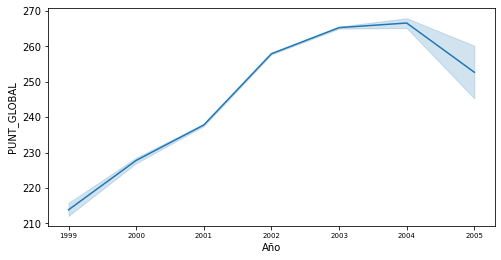

In [67]:
import matplotlib.ticker as mtick
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

sns.lineplot(data=basea, x="Año", y="PUNT_GLOBAL")
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter('{x:1.0f}')
plt.show()

### What?,Why?,How?

 * **What?** 

   Para este grafico de línea se decidió hallar el puntaje promedio para el año de nacimientos de las personas que presentaron el examen saber 11 es por eso que se decidió realizar una grafico de línea para poder comparar cada uno de los años seleccionados, cabe aclarar que estos años toco acotarlos ya que se encontraban años que no era coherentes como el caso de los años 1910,2014 que son personas las que no tienen Tarjeta de identidad, o son personas demasiado pequeñas, para el **Datasets** se tiene que es de formato **table** con sus correspondientes **ítems** y **Atributtes** además para el **Dataset Availability** se tiene que es **estático** ya que no se tiene ningun tipo de interactividad, con respecto a los **Atributes** tenemos que es de carácter **Ordered** con característica **Quantitative**, y con respecto al **Ordering Direction** se muestra que es **Sequential**.
   
 
  * **Why?**
     
    Para el **Actions** de este grafico se tienen 2 uno de ellos es **Analyze** ya que por medio de este grafico podemos **Discover** y también **Present** cabe aclarar que estas categorías están con la variable **Consume**, la segunda que se maneja es **Query**, la cual no permite **Compare** cada uno de los puntajes promedios de año a año, el **Targets** que utilizamos solo sería **All Data** teniendo las 2 variables **Trends**, **Features**.
   
      
  
  * **How?**
    
    Para este grafico de linea solo vamos a utilizar **Encode** y **Reduce**, para la primera se selecciono **Arange** con la variable **Express**, y para nuestra categorias **Reduce** solo se utilizo **Filter** para el tipo de documento, y tambien se utilizo **Aggregate** Para los años.

### Marcas y Canales

**Marca**:
 
 La marca para esta visualización vendría a ser de **lines**. 
 
 
 
**Canal**:
 
 En este caso se tiene una posición **Vertical** para el puntaje promedio general y posición **Horizontal** vendria a tener los años de nacimiento como bien lo indica la base. 

### Mejoras Posibles

Esta no es una mejora hacia el grafico sino a la recoleccion de información porque como se dijo anteriormente se tiene datos bastante errones y son muchos dastos no son pocos, otro inconveniente que se tuvo fue pasar de formato (Dia,Mes,Año, Hora) a formato año.

### Visualizacion 3(Espaciales)

In [ ]:
Saber_11_2019_a.ESTU_DEPTO_RESIDE.value_counts()

In [ ]:
path ="C:/Users/kevin/OneDrive/Documentos/Downloads"
fullP= os.path.join(path,'personas_icfes.csv')

In [ ]:
per_icfes = pd.read_csv(fullP,sep=";", dtype={"id": str})

In [ ]:
per_icfes.info()

In [ ]:
per_icfes['lat'] = [float(str(i).replace(",", ".")) for i in per_icfes['lat']]
per_icfes['lon'] = [float(str(i).replace(",", ".")) for i in per_icfes['lon']]

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json') as response:
    departamentos = json.load(response)

print(departamentos['features'])

In [ ]:
print(departamentos["features"][0]["properties"])

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(per_icfes, geojson=departamentos, 
                           locations='id', 
                           featureidkey = 'properties.DPTO',
                           color='un_per',
                           color_continuous_scale="Viridis",
                           center={"lat": 4.570868, "lon": -74.297333},
                           mapbox_style="mapbox://styles/mapbox/dark-v10",
                           zoom=8.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

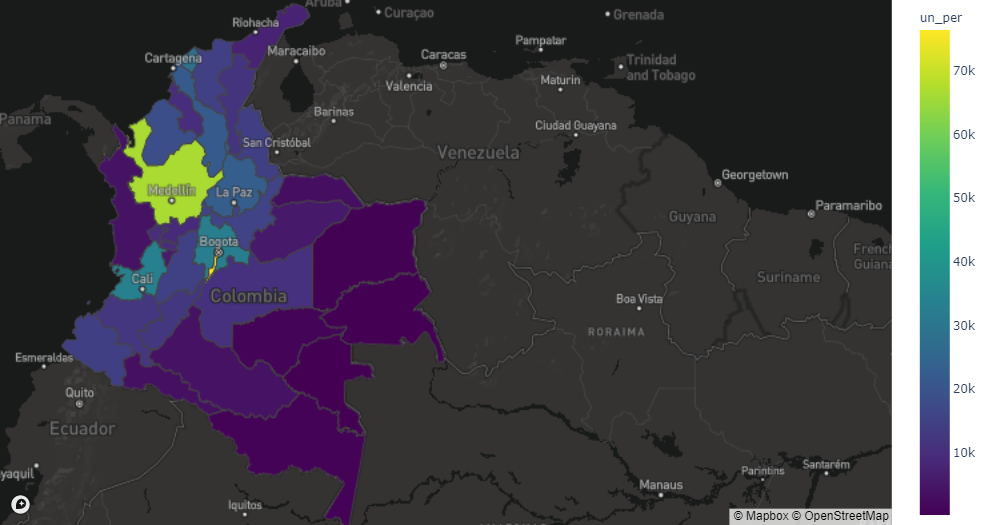

### What?,Why?,How?

 * **What?** 
      
     Para este Mapa coropleto nos muestran la cantidad de personas que presentaron le examen icfes para el año 2019 semestre 2, al ser un mapa no se maneja ningún tipo de eje solo centramos en grafico con la longitud y latitud de Colombia, para poder realizar este grafico se utilizó solo la variable categoría de departamentos que presentaron esta prueba, así que el **tipo de datasets** que se utilizó seria **tabla** ya que fue la forma más adecuada de agrupar los datos, en **Datasets Avaibility** nos está indicando que es estático ya que no tiene ninguna interactividad, los **Atributos** para este mapa cloropleto  se tiene que es de carácter **Ordinal** ya que para cada valor se le asigna su debido color. 

 
  * **Why?**
     
    los **Action** para nuestro Mapa coropleto será **Analyze** principalmente ya que este grafico tiene la característica **Consume** porque estamos **Discover** para este mapa pero adicionalmente se puede llegar también a **Present**, y por último se puede **Enjoy** porque nos permite ver como estuvo Colombia distribuida, el otro **Action** que tenemos vendría a ser **Query** porque podemos ver un pequeño resumen de como estuvieron distribuidas las pruebas saber 11 para el año 2019.
    
    En el caso de **Targets** solo se tendría **Spatial Data** con su respectiva variable **Shape** ya que estamos visualizando el mapa de Colombia.   
. 
    
      
  
  * **How?**

    En el grafico realizado se tiene solo 2 categorías que serían **Encode** y **Reduce** , en el caso de **Encode** utilizamos las 2 sub categorías que son **Arrange** y **Maps** , en la primera solo se utilizó 1  y  es **Use** ya que estamos trabajando con el mapa de un país que en este caso es Colombia, la segunda sub categoría utilizamos solo **Color** para poder diferenciar cada uno del conjunto de personas por departamento; Para el caso de **Reduce** se utilizó **Filter** y **Embeb**.

### Marcas y Canales

**Marca**:
 
 La marca para este grafico será áreas, ya que para cada departamento se determina utilizando una geometría determinada. 
 
 
 
**Canal**:
 
 En este caso se tiene una posición **Both** ya que estamos realizando esta visualización en un mapa, también cuenta con el canal de **Color** ya que este color cambia dependiendo de los estudiantes que presentaron la prueba.


### Mejoras Posibles

Una de las mejoras posibles para este grafico seria mostrar el nombre de cada uno de los departamentos de Colombia ya que una personas externa no puede ubicarse fácilmente en este mapa y no conoce el mapa de todo, la segunda mejora  es que se  podría eliminar el pueblo la paz ya que resalta más que la capital de ese departamento que vendría a ser Bucaramanga, la última mejora con respecto a esta visualización es que se pueda evidenciar con claridad el departamento de San Andrés y providencia ya que toca acercar bastante hacia esa zona para poder verlo.